<a href="https://colab.research.google.com/github/yardenzaki/yardenzaki/blob/main/Simple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression test

In [85]:
## impotrs
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt


In [86]:
#Y = 2*X + 3 with noise
x = np.linspace(1,3*np.pi,300)
y = 3 * np.sin(x)
noise = np.random.uniform(-0.25,0.25,300)
y += noise
f' {y.mean()}'

' 0.5489603333652631'

In [87]:
# splitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
df = pd.DataFrame()
df["X_train"]=X_train
df["X_test"]=pd.Series(X_test)
df["y_train"]=y_train
df["y_test"]=pd.Series(y_test)
X_test =X_test.reshape(-1,1)
X_train =X_train.reshape(-1,1)
y_test =y_test.reshape(-1,1)
y_train =y_train.reshape(-1,1)
df

,X_train,X_test,y_train,y_test
0,7.536951,6.719833,2.979640,1.502680
1,2.662414,8.494953,1.168351,2.181960
2,1.169059,5.282830,2.608490,-2.572398
3,6.212655,1.253589,-0.368313,2.928151
4,5.874537,7.565128,-1.148466,2.955724
...,...,...,...,...
235,6.297185,NaN,-0.069047,NaN
236,3.000533,NaN,0.208840,NaN
237,3.986711,NaN,-2.016462,NaN
238,8.607659,NaN,2.329306,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


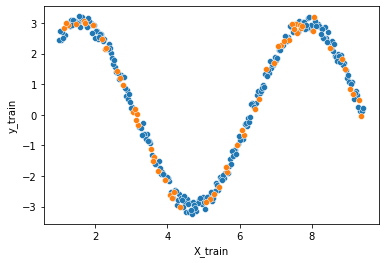

In [88]:
sns.scatterplot(df["X_train"],df["y_train"],data=df)
sns.scatterplot(df["X_test"],df["y_test"],data=df)


In [89]:
#Normalizing  using pipelime and StandardScaler (could use StandardScaler only... )
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train_pipe = Pipeline([('scaler', StandardScaler())]) ##Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.
X_test_pipe = Pipeline([('scaler', StandardScaler())]) ##Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.

X_train_preprocessed = X_train_pipe.fit_transform(X_train)
X_test_preprocessed = X_test_pipe.fit_transform(X_test)

#print(X_train_preprocessed)


## Linear Regression

In [90]:
# defining the linear regression model
from sklearn.linear_model import LinearRegression
lr =LinearRegression()


In [91]:
#fit
lr.fit(X_train,y_train) # train

LinearRegression()

In [92]:
# Weights and bias
lr.coef_


array([[0.05170231]])

In [93]:
lr.intercept_

array([0.23929466])

In [94]:
# predict:
from sklearn.metrics import mean_squared_error

y_hat = lr.predict(X_test)
df["y_hat"] = pd.Series(y_hat.flatten())
df

,X_train,X_test,y_train,y_test,y_hat
0,7.536951,6.719833,2.979640,1.502680,0.586726
1,2.662414,8.494953,1.168351,2.181960,0.678503
2,1.169059,5.282830,2.608490,-2.572398,0.512429
3,6.212655,1.253589,-0.368313,2.928151,0.304108
4,5.874537,7.565128,-1.148466,2.955724,0.630429
...,...,...,...,...,...
235,6.297185,NaN,-0.069047,NaN,NaN
236,3.000533,NaN,0.208840,NaN,NaN
237,3.986711,NaN,-2.016462,NaN,NaN
238,8.607659,NaN,2.329306,NaN,NaN


In [95]:
# get prediction error 
mse = mean_squared_error(y_test, y_hat)
print(y_train.mean())
rmse = np.sqrt(mse)
rmse 

0.5084776645098628


2.0225415685062957

In [96]:
# cross val score
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error'

scores = cross_val_score(lr, X_train, y_train, scoring=scoring, cv=10)
# You can use `metrics.SCORERS.keys()` to display the metrics scoring that you can use.

from sklearn import metrics
print(metrics.SCORERS.keys())
scores = -scores # The returned scores are negative. Let's make it positive.

print(scores)
scores.mean()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

2.139445831271437

In [97]:
from sklearn.model_selection import cross_val_predict

y_hat = cross_val_predict(lr, X_train, y_train, cv=30)
df["y_hat_CV"] = y_hat
# get prediction error 
mse = mean_squared_error(y_train, y_hat)
print(y_train.mean())
rmse = np.sqrt(mse)
rmse 

0.5084776645098628


2.137359473016739

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_train   240 non-null    float64
 1   X_test    60 non-null     float64
 2   y_train   240 non-null    float64
 3   y_test    60 non-null     float64
 4   y_hat     60 non-null     float64
 5   y_hat_CV  240 non-null    float64
dtypes: float64(6)
memory usage: 11.4 KB


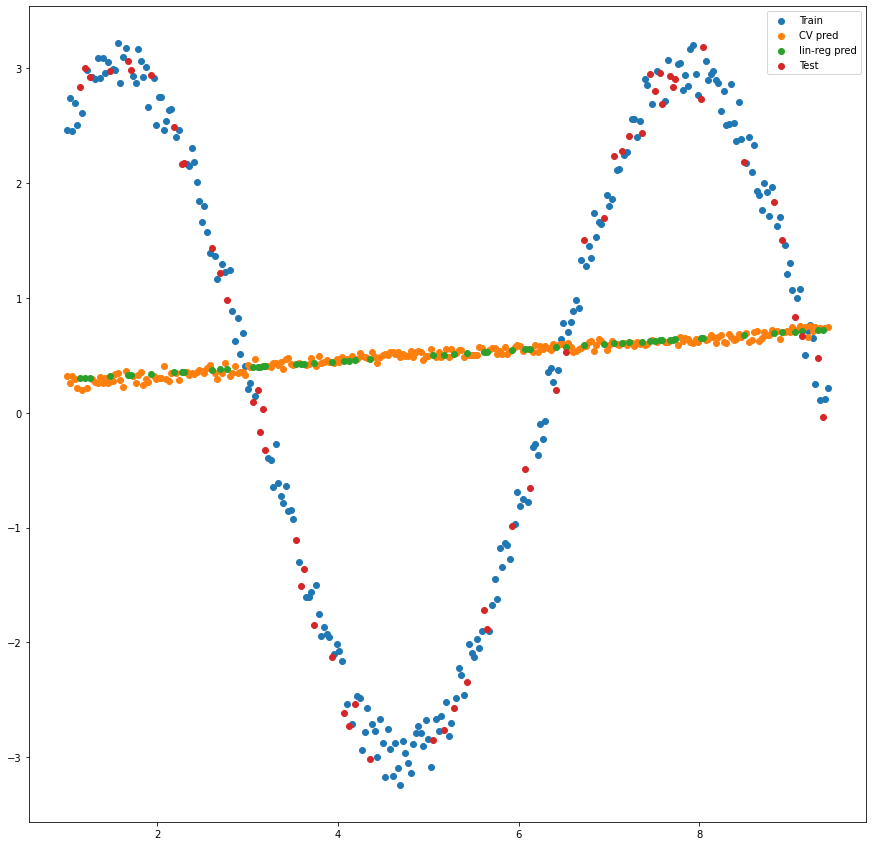

In [99]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(df["X_train"],df["y_train"],label = "Train")
plt.scatter(df["X_train"],df["y_hat_CV"],label = "CV pred" )

plt.scatter(df["X_test"],df["y_hat"],label = "lin-reg pred" )

plt.scatter(df["X_test"],df["y_test"],label ="Test")
plt.legend()
plt.show()


## Random Forest

In [100]:
# Try regression with Random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1)

forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=42)

In [101]:
#Evaluate thr tree
from sklearn.metrics import mean_squared_error
y_val_forest = forest_reg.predict(X_train)
y_hat = forest_reg.predict(X_test)
df["y_hat_forest"]=pd.Series(y_hat)
df["y_val_forest"]=pd.Series(y_val_forest)
# print(y_hat)
# print(y_train)


mse = mean_squared_error(y_test,y_hat)
rmse = np.sqrt(mse)
rmse

0.2072030589383134

In [102]:

# improving forest
forest_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [103]:


from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators':[100,200,300,400,500],
    'max_leaf_nodes':list(range(0,20))}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=5)

grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18,
                                            19],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [104]:
grid_search.best_params_

{'max_leaf_nodes': 19, 'n_estimators': 100}

In [105]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_leaf_nodes=19, random_state=42)

In [106]:
forest_best = grid_search.best_estimator_
forest_best.score(X_test,y_test)

0.9771828314139983

In [107]:
y_hat = forest_best.predict(X_test)
df["forest_best"]= pd.Series(y_hat)
mse = mean_squared_error(y_test,y_hat)
forst_best_rmse = np.sqrt(mse)
forst_best_rmse




0.30525173724587423

In [125]:
# Testing the "forest best" on new data
x_new = np.linspace(1,16*np.pi,1000).reshape(-1,1)
x_new_pipe = Pipeline([('scaler', StandardScaler())]) ##Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.
x_new_preprocessed = x_new_pipe.fit_transform(x_new) 
x_new_preprocessed = x_new
y_new = forest_best.predict(x_new_preprocessed)
df["x_new"]= pd.Series(x_new.flatten())
df["best_forest_on_new_data"]= pd.Series(y_new)

## xgboost 

In [109]:
import xgboost as xgb

In [126]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) #convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 30, alpha = 10, n_estimators = 15)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
print(preds)
XGpreds_new = xg_reg.predict(x_new)
df["XGpreds"]= pd.Series(preds)
df["XGpreds_new"]= pd.Series(XGpreds_new)
mse = mean_squared_error(y_test,preds)
XG_rmse = np.sqrt(mse)
XG_rmse


[11:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 1.2810578   2.1818123  -2.4858718   2.9211392   2.9694695   2.899127
  0.7826324  -2.171867    2.6079385  -0.9576733   3.064351    1.366095
  2.2413986   2.4672523  -0.77595115  2.5598788   0.50684357  1.8830138
 -2.520334   -1.901505   -0.39552283 -2.6991963   2.769484    3.0503511
 -2.092868    2.4040742   1.4567018   0.11354634 -2.0201867   3.064351
  2.99256    -1.9040682   2.6694188   3.1640885   1.8556317  -2.7134824
  2.9808915  -1.2805924   2.1607466   0.2601198  -1.6073627   0.14866796
  0.9972517   1.2885927  -0.39552283  1.2398376   2.7225616   2.6977017
 -2.6991963   2.9694695  -0.77595115 -2.6723497   3.0394542   0.14866796
  0.11900908  1.6240232  -1.507421   -1.2805924   0.26827657  2.9357378 ]


0.20556342684212692

In [111]:
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.figure(figsize=(30,30))
# plt.show()

## Comparison

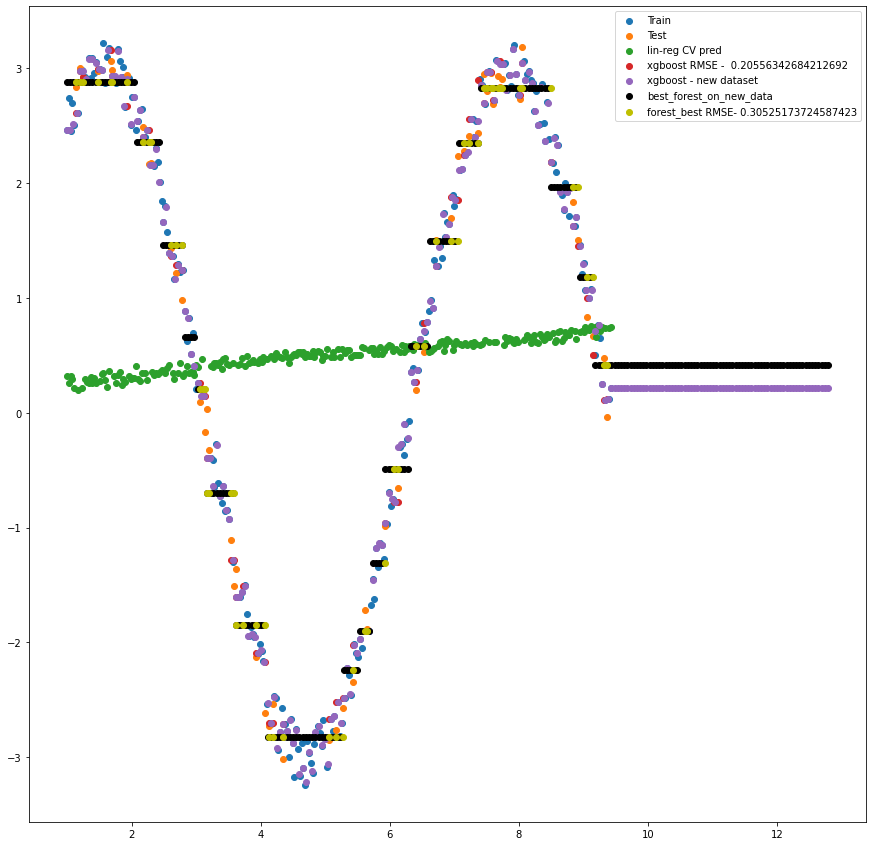

In [127]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(df["X_train"],df["y_train"],label = "Train")
plt.scatter(df["X_test"],df["y_test"],label ="Test")

#lin-reg
plt.scatter(df["X_train"],df["y_hat_CV"],label = "lin-reg CV pred" )
#plt.scatter(df["X_test"],df["y_hat"],label = "lin-reg pred" )

#XGboost
plt.scatter(df["X_test"],df["XGpreds"],label =f"xgboost RMSE -  {XG_rmse}")
plt.scatter(df["x_new"],df["XGpreds_new"],label ="xgboost - new dataset")


# random forest
#plt.scatter(df["X_test"],df["y_hat_forest"],color='k',label ="Forest")

plt.scatter(df["x_new"],df["best_forest_on_new_data"],color='k',label ="best_forest_on_new_data")
plt.scatter(df["X_test"],df["forest_best"],color='y',label =f"forest_best RMSE- {forst_best_rmse}")


plt.legend()
plt.show()

## Summary
In this test I: 



1.   Pre-processed the data (Train-Test splits, Noralizing with StandardScalar using a Pipeline) 
2.   tried to eastimate a noisy sine function with:
  *  Linear Regression - As expected, under-fits non-linear function. 
  *   Random forests estimator - due to its nonlinear capabilities, and thanks to GridSearch CV (hyperparameters optimization) it was possible to get good enough predictions with a sufficient RMSE.
  * XGBoost which seems to be the best estimator (cons: had to fine tune the parameters)

3. Both RandomForest and XGBoost cannot extrapolate on new dataset!






